# Example Data Notebook for TAQ Database


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import collections
from itertools import chain
import matplotlib.pyplot as plt
import configobj


from data_preprocessing.query_helpers import client_connection
from data_preprocessing.preprocess import clean_trades,clean_quotes,chunk_clean


### Personal Details

Access information will be stored within an env file

In [6]:
config = configobj.ConfigObj(".env")
host = config["host"]
server_user = config["server_user"]
server_password = config["server_password"]
db_user = config["db_user"]
db_pass = config["db_pass"]


### Setup the client connection to the DB

In [7]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

### Example Trade Query

Includes support for multiple exchanges  (Required by the Order Protection Rule)

In [8]:
exchange="'N'"
symbol='AAPL'
start= "2022-01-01"
end="2022-01-10"


In [9]:
result,path=conn.client_get_trades(exchange,symbol,start,end)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)


Trade Query for 'N' AAPL 2022-01-01 2022-01-10


INFO:paramiko.transport:Authentication (password) successful!
INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


In [10]:
trades=pd.read_csv(path)
trades=clean_trades(trades)
trades

,SIP_Timestamp,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Trade_Through_Exempt_Indicator,date
2022-01-03 09:30:02.640469,2022-01-03 09:30:02.640840,N,AAPL,1,177.82,@ I,N,0,125318,38,,0,2022-01-03
2022-01-03 09:30:02.640469,2022-01-03 09:30:02.640840,N,AAPL,99,177.81,@ I,N,0,125319,39,,0,2022-01-03
2022-01-03 09:30:03.192701,2022-01-03 09:30:03.193069,N,AAPL,10,177.88,@ I,N,0,126520,40,,0,2022-01-03
2022-01-03 09:30:03.348215,2022-01-03 09:30:03.348582,N,AAPL,1,177.86,@ I,N,0,126765,41,,0,2022-01-03
2022-01-03 09:30:03.382234,2022-01-03 09:30:03.382602,N,AAPL,1,177.84,@ I,N,0,126846,42,,0,2022-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07 15:59:58.008136,2022-01-07 15:59:58.008505,N,AAPL,100,172.04,@F,N,0,6331620,9723,,1,2022-01-07
2022-01-07 15:59:59.005799,2022-01-07 15:59:59.006168,N,AAPL,100,172.04,@F,N,0,6334172,9724,,1,2022-01-07
2022-01-07 15:59:59.027786,2022-01-07 15:59:59.028155,N,AAPL,100,172.06,@F,N,0,6334234,9725,,1,2022-01-07
2022-01-07 15:59:59.903259,2022-01-07 15:59:59.903627,N,AAPL,100,172.17,@,N,0,6336236,9726,,0,2022-01-07


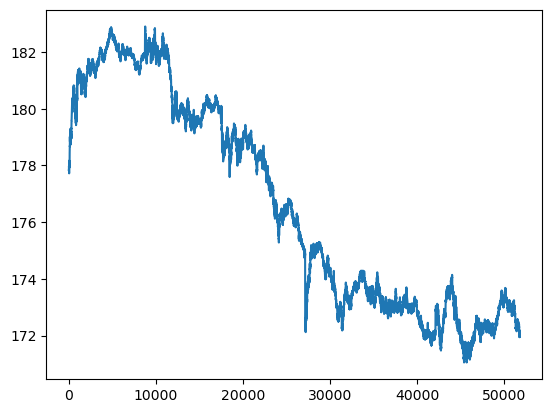

In [11]:
plt.plot(trades['Trade_Price'].values)

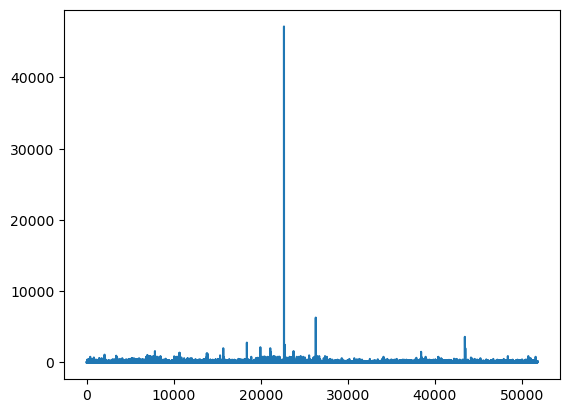

In [12]:
plt.plot(trades['Trade_Volume'].values)

### Example Quote Query

Includes support for multiple exchanges (Required by the Order Protection Rule)

In [13]:
exchange="'N'"
symbol='AAPL'
start= "2022-01-01"
end="2022-01-03"

In [14]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

### Loop through multiple days without server timeout

This will save the data in a csv file one directory above 

In [15]:
conn.get_quotes_range(exchange,symbol,start,end)

[]

### Examine Reconstructed Event Book

- This examines the reconstructed event book
- One can generate the features from the raw data (with cleaning and reconstruction) via one command

In [5]:
import pandas as pd

events=pd.read_csv('data/raw_data/2020-01-02/AAPL_quotes_cleaned.csv', index_col=0,nrows=100).head(50)
events

,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,National_BBO_Indicator,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Participant_Timestamp,Security_Status_Indicator,Date,YearMonth
2020-01-02 09:30:00.089010,Q,AAPL,296.00,87.0,296.40,1.0,R,261711,0,N,NaN,0,NaN,NaN,1900-01-01 09:30:00.089010122,,2020-01-02,202001
2020-01-02 09:30:00.095108,Q,AAPL,296.00,107.0,296.40,1.0,R,261792,0,N,NaN,0,NaN,NaN,1900-01-01 09:30:00.095108640,,2020-01-02,202001
2020-01-02 09:30:00.134049,P,AAPL,296.09,1.0,296.30,66.0,R,262392,0,N,NaN,0,NaN,NaN,1900-01-01 09:30:00.134049792,,2020-01-02,202001
2020-01-02 09:30:00.134062,P,AAPL,296.09,1.0,296.29,1.0,R,262393,2,N,NaN,0,NaN,NaN,1900-01-01 09:30:00.134062592,,2020-01-02,202001
2020-01-02 09:30:00.134071,Z,AAPL,295.91,1.0,296.81,1.0,R,262384,0,N,NaN,0,NaN,NaN,1900-01-01 09:30:00.134071000,,2020-01-02,202001
2020-01-02 09:30:00.134075,K,AAPL,296.24,2.0,296.39,1.0,R,262387,0,N,NaN,0,NaN,NaN,1900-01-01 09:30:00.134075000,,2020-01-02,202001
2020-01-02 09:30:00.134336,K,AAPL,296.21,1.0,296.39,1.0,R,262394,2,N,NaN,0,NaN,NaN,1900-01-01 09:30:00.134336000,,2020-01-02,202001
2020-01-02 09:30:00.134462,K,AAPL,296.21,1.0,296.36,1.0,R,262398,0,N,NaN,0,NaN,NaN,1900-01-01 09:30:00.134462000,,2020-01-02,202001
2020-01-02 09:30:00.134472,Z,AAPL,295.91,1.0,296.36,1.0,R,262397,0,N,NaN,0,NaN,NaN,1900-01-01 09:30:00.134472000,,2020-01-02,202001
2020-01-02 09:30:00.134498,K,AAPL,296.21,1.0,296.36,2.0,R,262400,0,N,NaN,0,NaN,NaN,1900-01-01 09:30:00.134498000,,2020-01-02,202001


In [7]:
import pandas as pd

events=pd.read_csv('data/features/2020-01-02/AAPL_reconstructed_features.csv', index_col=0,nrows=250)
events

,Date,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Correction_Indicator,Sequence_Number,Trade_Id,...,YearMonth,Microprice,Realized_Spread,MOX_Identifier,Effective_Spread,Imbalance,Trade_Side,Midprice,Imbalance_Weighted_Effective_Spread,Price_Impact
index,,,,,,,,,,,,,,,,,,,,,
2020-01-02 09:30:00.089010,2020-01-02,Q,AAPL,NaN,NaN,NaN,NaN,NaN,261711,NaN,...,202001.0,296.004545,NaN,0.0,0.40,87.000000,NaN,296.200,NaN,NaN
2020-01-02 09:30:00.095108,2020-01-02,Q,AAPL,NaN,NaN,NaN,NaN,NaN,261792,NaN,...,202001.0,296.003704,NaN,1.0,0.40,107.000000,NaN,296.200,NaN,NaN
2020-01-02 09:30:00.134049,2020-01-02,P,AAPL,NaN,NaN,NaN,NaN,NaN,262392,NaN,...,202001.0,296.296866,NaN,2.0,0.21,0.015152,NaN,296.195,NaN,NaN
2020-01-02 09:30:00.134062,2020-01-02,P,AAPL,NaN,NaN,NaN,NaN,NaN,262393,NaN,...,202001.0,296.190000,NaN,3.0,0.20,1.000000,NaN,296.190,NaN,NaN
2020-01-02 09:30:00.134071,2020-01-02,Z,AAPL,NaN,NaN,NaN,NaN,NaN,262384,NaN,...,202001.0,296.360000,NaN,4.0,0.90,1.000000,NaN,296.360,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-02 09:30:00.919229,2020-01-02,B,AAPL,100.0,296.28,@F,N,0.0,21692,5.0,...,NaN,NaN,NaN,193.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 09:30:00.919549,2020-01-02,V,AAPL,100.0,296.28,@,N,0.0,21694,2.0,...,NaN,NaN,NaN,194.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 09:30:00.928048,2020-01-02,J,AAPL,NaN,NaN,NaN,NaN,NaN,273086,NaN,...,202001.0,296.250000,NaN,195.0,1.62,1.000000,NaN,296.250,NaN,NaN


Below would suggest we are working with BBO per exchange. Note how all posted quotes occur at traded prices. This is a result of only BBO quotes being included

In [11]:
events[['Trade_Price','Bid_Price','Offer_Price','Symbol','Exchange']][events['Exchange']=='K'].head(50)

,Trade_Price,Bid_Price,Offer_Price,Symbol,Exchange
index,,,,,
2020-01-02 09:30:00.134075,NaN,296.24,296.39,AAPL,K
2020-01-02 09:30:00.134336,NaN,296.21,296.39,AAPL,K
2020-01-02 09:30:00.134336,296.240,NaN,NaN,AAPL,K
2020-01-02 09:30:00.134371,296.240,NaN,NaN,AAPL,K
2020-01-02 09:30:00.134462,NaN,296.21,296.36,AAPL,K
2020-01-02 09:30:00.134498,NaN,296.21,296.36,AAPL,K
2020-01-02 09:30:00.134532,NaN,296.10,296.36,AAPL,K
2020-01-02 09:30:00.134532,296.210,NaN,NaN,AAPL,K
2020-01-02 09:30:00.134613,NaN,296.10,296.31,AAPL,K


In [3]:
events['MOX_Identifier']

index
2020-01-02 09:30:00.089010     0.0
2020-01-02 09:30:00.095108     1.0
2020-01-02 09:30:00.134049     2.0
2020-01-02 09:30:00.134062     3.0
2020-01-02 09:30:00.134071     4.0
2020-01-02 09:30:00.134075     5.0
2020-01-02 09:30:00.134336     6.0
2020-01-02 09:30:00.134336     6.0
2020-01-02 09:30:00.134371     7.0
2020-01-02 09:30:00.134462     8.0
2020-01-02 09:30:00.134472     9.0
2020-01-02 09:30:00.134498    10.0
2020-01-02 09:30:00.134532    11.0
2020-01-02 09:30:00.134532    11.0
2020-01-02 09:30:00.134613    12.0
2020-01-02 09:30:00.134636    13.0
2020-01-02 09:30:00.134652    14.0
2020-01-02 09:30:00.134667    15.0
2020-01-02 09:30:00.136081    16.0
2020-01-02 09:30:00.136189    17.0
2020-01-02 09:30:00.136330    18.0
2020-01-02 09:30:00.136347    19.0
2020-01-02 09:30:00.136567    20.0
2020-01-02 09:30:00.143499    21.0
2020-01-02 09:30:00.157191    22.0
2020-01-02 09:30:00.157191    22.0
2020-01-02 09:30:00.180269    23.0
2020-01-02 09:30:00.193558    24.0
2020-01-02 09:

### TO download S&P500 Ticker List

In [1]:
import pandas as pd
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873
